In [ ]:
# default_exp core

# Sequence Analysis Overview

> How to ask questions in the sequence domain

The sequence domain concerns the order in which events happen, as opposed to when they happen in time (time domain), or how frequenctly they occur (frequency domain).
Applying techniques from sequence analysis means framing your questions in the sequence domain.

As a simple example, let's consider a person's workday routine, which may consist of one of three states e.g. (*resting*, *working*,*eating*). In pysan a sequence representing one day's work can be represented as a list of integers, where each integer is equal to one of the three states e.g. (1, 2, 3). These can be represented and plotted using the `plot_sequence` function as follows;

In [5]:
#export
from pysan.elements import get_alphabet
import numpy as np, matplotlib.pyplot as plt

def plot_sequence(sequence, highlighted_ngrams=[]):
    "Creates a standard sequence plot where each element corresponds to a position on the y-axis. The optional highlighted_ngrams parameter can be one or more n-grams to be outlined in a red box."
    np_sequence = np.array(sequence)
    alphabet_len = len(get_alphabet(sequence))

    plt.figure(figsize=[len(sequence)*0.3,alphabet_len * 0.3])

    unique_values = list(set(sequence))
    for i, value in enumerate(unique_values):

        points = np.where(np_sequence == value, i, np.nan)

        plt.scatter(x=range(len(np_sequence)), y=points, marker='s', label=value, s=35)

    plt.yticks(range(len(unique_values)), unique_values)
    plt.ylim(-1, len(unique_values))

    # highlight any of the n-grams given

    if highlighted_ngrams != []:

        def highlight_ngram(ngram):
            n = len(ngram)
            match_positions = []
            for x in range(len(sequence) -  n + 1):
                this_ngram = sequence[x:x + n]
                if str(this_ngram) == str(ngram):
                    match_positions.append(x)

            for position in match_positions:
                bot = min(ngram) - 1.5
                top = max(ngram) - 0.5
                left = position - 0.5
                right = left + n

                line_width = 1
                plt.plot([left,right], [bot,bot], color='red', linewidth=line_width)
                plt.plot([left,right], [top,top], color='red', linewidth=line_width)
                plt.plot([left,left], [bot,top], color='red', linewidth=line_width)
                plt.plot([right,right], [bot,top], color='red', linewidth=line_width)

        # check if only one n-gram has been supplied
        if type(highlighted_ngrams[0]) is int:

            highlight_ngram(highlighted_ngrams)

        else: # multiple n-gram's found

            for ngram in highlighted_ngrams:
                highlight_ngram(ngram)

    return plt

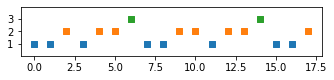

In [7]:
from pysan.core import plot_sequence
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
plt = plot_sequence(sequence)
plt.show()

This same method can also highlight ngrams of interest using its second parameter.

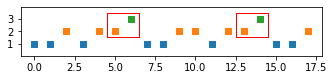

In [9]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
plt = plot_sequence(sequence, highlighted_ngrams = [[2,3]])
plt.show()

This is a good first step in understanding the dynamics of the sequence, e.g. which activities typically follow working, what portion of the day is spent resting, etc. The pysan library contains many methods for formalising the answers to each of these questions, but plotting is always a good first step.

In some cases, it can be useful to show each sequence in one dimension as a continuous line of changing states (colors). To this end, the `plot_sequence_1d` method can be used which produces the image below.

In [1]:
#export
def plot_sequence_1d(sequence, flat=False):
    "Plots a sequence in one dimension - useful for stacking multiple sequences above one another."

    np_sequence = np.array(sequence)
    alphabet_len = len(get_alphabet(sequence))

    plt.figure(figsize=[len(sequence)*0.4, 0.5])

    unique_values = list(set(sequence))
    for i, value in enumerate(unique_values):

        points = np.where(np_sequence == value, 1, np.nan)

        plt.bar(range(len(points)), points, width=1, align='edge', label=i)

    plt.ylim(-0.3, 1.3)
    plt.tick_params(
        axis='y',
        which='both',
        left=False,
        labelleft=False)
    plt.xlabel('Position, p')
    plt.legend(bbox_to_anchor=(1, 1.2), loc='upper left')

    return plt

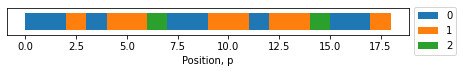

In [3]:
from pysan.core import plot_sequence_1d
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
plt = plot_sequence_1d(sequence)
plt.show()